In [1]:
!pip install keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from sklearn.metrics import confusion_matrix,  classification_report
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import to_categorical

In [3]:
data = pd.read_csv('ds2.csv',sep=';')

In [4]:
data

,ID,Min_EKG,Max_EKG,Mean_EKG,STDEV_EKG,Min_GSR,Max_GSR,Mean_GSR,STDEV_GSR,Min_Tep,Max_Tep,Mean_Tep,STDEV_Tep,Label
0,1_h,171,650,407.777358,137.906972,132,460,309.290566,95.519882,37.15,39.10,38.103925,0.564672,Neutral
1,2_h,170,650,420.826415,140.368050,130,460,291.343396,94.786518,35.68,37.63,36.632566,0.557221,Negative
2,3_h,174,649,411.766038,136.412941,131,456,294.433962,93.505167,37.16,38.61,37.878189,0.415849,Neutral
3,4_h,171,650,414.396226,145.213211,139,460,299.184906,97.555616,36.75,37.12,36.928604,0.112906,Neutral
4,5_h,170,650,415.049057,141.312521,131,458,277.800000,97.853950,36.75,37.12,36.948868,0.111699,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,16_z,175,524,360.529412,98.325091,131,320,237.094118,55.566053,36.51,38.78,37.670588,0.695977,Negative
136,17_z,176,530,331.858824,103.905767,131,318,222.541177,53.065448,36.61,38.78,37.761647,0.660787,Negative
137,18_z,170,522,346.070588,105.025143,138,320,233.670588,52.125852,36.46,38.75,37.694588,0.690665,Negative
138,19_z,176,514,333.800000,101.663052,136,319,226.470588,51.480599,36.51,38.79,37.567529,0.663879,Negative


# **Kontrola dát**


In [5]:
data['Label'].value_counts()

Negative    60
Positive    43
Neutral     37
Name: Label, dtype: int64

In [6]:
mapovanie = {'Negative': 0, 'Positive': 1, 'Neutral': 2}

In [7]:
def preprocesing(df):
    df = df.copy()
    
    df['Label'] = df['Label'].replace(mapovanie)
    
    y = df['Label'].copy()
    X = df.drop(['ID','Label'], axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=12)
    
    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = preprocesing(data)
#X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [9]:
#X_train = X_train.apply(lambda row: row.fillna(row.mean()), axis=1)


In [10]:
#X_test = X_test.apply(lambda row: row.fillna(row.mean()), axis=1)

In [11]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)


In [12]:
from keras.layers.core.dropout import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(32, input_dim=12,kernel_regularizer=regularizers.l2(0.001)))
model.add(LeakyReLU(alpha=0.02))
#model.add(BatchNormalization())
#model.add(Dropout(0.02))
model.add(Dense(16,kernel_regularizer=regularizers.l2(0.001)))
model.add(LeakyReLU(alpha=0.02))
#model.add(Dropout(0.02))
model.add(Dense(8,kernel_regularizer=regularizers.l2(0.001)))
model.add(LeakyReLU(alpha=0.02))
#model.add(BatchNormalization())
model.add(Dropout(0.02))
model.add(Dense(3, activation= 'softmax'))

sgd = SGD(learning_rate=0.05, decay=5e-4, momentum= 0.9,nesterov= True)

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8)                 0         
                                                                 
 dropout (Dropout)           (None, 8)                 0

In [14]:

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer= 'Adamax', 
              metrics=['accuracy'])

In [15]:
%%time

keras_callbacks   = [ tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min', min_delta=0.0001)]
trenovanie = model.fit(X_train_scaled, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=1,callbacks= keras_callbacks )

Epoch 1/100
3/3 [==============================] - 1s 151ms/step - loss: 1.4270 - accuracy: 0.3258 - val_loss: 1.5120 - val_accuracy: 0.1739
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 1.3547 - accuracy: 0.3483 - val_loss: 1.4596 - val_accuracy: 0.1739
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 1.3351 - accuracy: 0.3258 - val_loss: 1.4153 - val_accuracy: 0.1739
Epoch 4/100
3/3 [==============================] - 0s 25ms/step - loss: 1.2899 - accuracy: 0.3146 - val_loss: 1.3776 - val_accuracy: 0.2609
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 1.2673 - accuracy: 0.3820 - val_loss: 1.3441 - val_accuracy: 0.3043
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 1.2365 - accuracy: 0.4045 - val_loss: 1.3158 - val_accuracy: 0.3478
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 1.2137 - accuracy: 0.4382 - val_loss: 1.2913 - val_accuracy: 0.3913
Epoch 8/100
3/3 [==

In [16]:
model_acc = model.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("Accuracy: {:.3f}%".format(model_acc * 100))

Accuracy: 85.714%


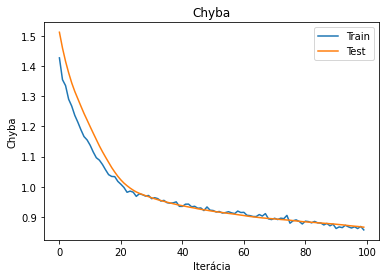

In [17]:
plt.plot(trenovanie.history['loss']) 
plt.plot(trenovanie.history['val_loss']) 
plt.ylabel('Chyba') 
plt.xlabel('Iterácia')
plt.title('Chyba') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

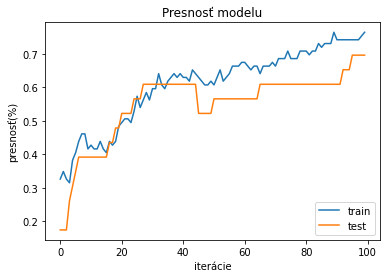

In [18]:
plt.plot(trenovanie.history['accuracy'])
plt.plot(trenovanie.history['val_accuracy'])
plt.title('Presnosť modelu')
plt.ylabel('presnosť(%)')
plt.xlabel('iterácie')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

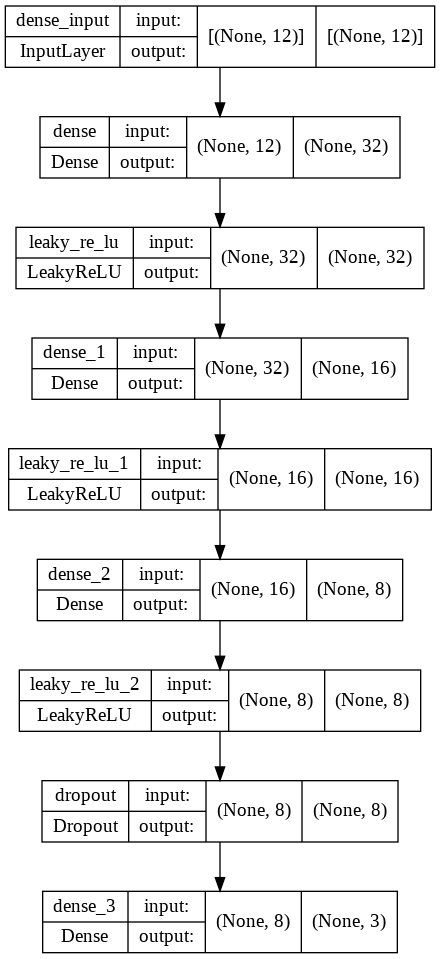

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model2.png',show_shapes=True, show_layer_names=True)